In [3]:
# Load necessary libraries
import os
import anndata as ad
import pandas as pd
import pathlib
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)

# import scimap
import scimap as sm 

def list_quant_paths(current_dir, csv_glob='*cellRing.csv'):
    p = pathlib.Path(current_dir).resolve()
    data = list(p.glob(f'quantification/{csv_glob}')) + list(p.glob(f'LSP*/quantification/{csv_glob}'))
    data = [str(d) for d in data]
    return data

# Set the working directory
os.chdir ("/Volumes/HiTS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/LSP21926") 
current_dir = os.getcwd()
#define a variable that will ocntain the file paths to each of the csv files. 
quant_files = list_quant_paths(current_dir)

In [4]:
quant_files

['/Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/LSP21926/quantification/LSP21926--unmicst_cellRing.csv']

In [5]:
adata = sm.pp.mcmicro_to_scimap (quant_files, remove_dna=False, log = True) 

Loading LSP21926--unmicst_cellRing.csv


In [6]:
#quant_file = ['/PAHT/blakd'] 
# Upload Mcmicro output into an anndata object 
# Data will log1 scale 
# raw data is kept - saved as anndata.raw.X 
#adata = sm.pp.mcmicro_to_scimap (quant_files, remove_dna=False, log = True) 


def list_quant_paths(current_dir):
# Define the current directory
    current_dir = current_dir
    data = []
    # Loop through subdirectories starting with "LSP"
    for subdir in os.listdir(current_dir):
        if subdir.startswith("LSP") and os.path.isdir(subdir):
            # Look for the quantification folder within each sample subdirectory
            quant_dir = os.path.join(current_dir, subdir, "quantification")
            if os.path.exists(quant_dir) and os.path.isdir(quant_dir):
                # Loop through files in the quantification folder
                for file in os.listdir(quant_dir):
                    # Check if the file contains "cellRing.csv"
                    if "cellRing.csv" in file:
                        # Print the path of the csv file
                        x=os.path.join(quant_dir, file)
                        print(x)
                        data.append(x)
    return data 

#Function to parse names to only get LSP ID 
# make a mapping of 'LSP17592_P66_A31_C128_HMS_Melanoma_Orion7_ASCM@20230605_174249_333586_cellRing' to LSP17592
def parse_items_to_dict(items):
    parsed_dict = {}
    for item in items:
        lsp_value = item.split('_')[0]
        if lsp_value not in parsed_dict:
            parsed_dict[lsp_value] = []
        parsed_dict[lsp_value].append(item)
    return parsed_dict


# Call the function and print the result
result_dict = parse_items_to_dict(adata.obs['imageid'].unique())
print(result_dict)

{'LSP21926--unmicst': ['LSP21926--unmicst_cellRing']}


In [7]:
adata.X 

array([[7.98173373, 5.46765137, 4.45190153, ..., 5.14590274, 4.03016665,
        5.77404534],
       [8.13239686, 5.40984671, 4.31815755, ..., 5.14376975, 4.05596415,
        5.7986985 ],
       [8.25020777, 5.55927624, 4.4716625 , ..., 5.12886698, 4.0473008 ,
        5.78506922],
       ...,
       [8.0644667 , 4.77967291, 3.88358438, ..., 5.1812891 , 4.12931834,
        5.26266554],
       [8.46391793, 5.00910378, 3.96008417, ..., 5.18622802, 4.05313771,
        5.25717925],
       [7.45764596, 4.98306877, 4.25490987, ..., 5.13097097, 3.95372088,
        5.27182945]])

In [8]:
adata 
adata = sm.hl.rename(adata, rename=result_dict, from_column='imageid', to_column='imageid_rename') 

Renaming LSP21926--unmicst_cellRing to LSP21926--unmicst


In [9]:
adata.raw.X 

array([[2926.0013089 ,  235.90314136,   84.78992147, ...,  170.72643979,
          55.27028796,  320.83704188],
       [3401.94618834,  222.59730942,   74.05022422, ...,  170.36053812,
          56.74080717,  328.86995516],
       [3827.42116183,  258.63485477,   86.50207469, ...,  167.82572614,
          56.24273859,  324.40456432],
       ...,
       [3178.46016647,  118.06539834,   47.5980975 , ...,  176.91200951,
          61.13555291,  191.99524376],
       [4739.59498681,  148.77044855,   51.46174142, ...,  177.79287599,
          56.57783641,  190.93931398],
       [1732.0635514 ,  144.92149533,   69.45046729, ...,  168.18130841,
          51.12897196,  193.77196262]])

In [10]:
adata.var_names 

Index(['DNA1', 'CD226', 'MCC', 'IFNg', 'DNA2', 'GZMB', 'CD3E', 'IDO1', 'DNA3',
       'CD206', 'CD68', 'CD20', 'MPO', 'DNA4', 'CD4', 'IBA1', 'CD8a', 'panCK',
       'DNA5', 'CD163', 'CD36', 'CD112', 'aSMA', 'DNA6', 'HLADRB1', 'COX4',
       'CD31', 'GAPDH', 'DNA7', 'CPT1A', 'FOXP3', 'PD1', 'MCT', 'DNA8',
       'CD11b', 'Ki-67', 'CTLA4', 'LYZ', 'DNA9', 'ARG1', 'ICOS', 'NKG2A', 'S6',
       'DNA10', 'pSLP76', 'pStat1', 'p-mTOR', 'DNA11', 'CD204', 'IL4I1',
       'CD16'],
      dtype='object')

In [11]:
adata.obs 

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid,imageid_rename
LSP21926--unmicst_cellRing_1,2415.560209,1592.195681,1528.0,50.042195,41.420058,0.561167,0.947303,0.692029,-0.913344,1,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_2,2383.979372,1599.736323,1115.0,53.667463,28.967353,0.841821,0.815058,0.643022,-0.106766,2,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_3,2363.385892,1595.321577,482.0,27.479290,23.027063,0.545703,0.941406,0.595062,1.465023,3,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_4,2355.518987,1621.928919,1027.0,42.212283,38.070292,0.431993,0.801092,0.519211,1.491526,4,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_5,2321.685962,1620.147612,1382.0,65.163000,29.973194,0.887933,0.823109,0.492516,-1.054894,5,LSP21926--unmicst_cellRing,LSP21926--unmicst
...,...,...,...,...,...,...,...,...,...,...,...,...
LSP21926--unmicst_cellRing_872108,55924.500669,51337.097724,747.0,32.295948,29.459471,0.409807,0.973924,0.754545,1.468290,872108,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_872109,58233.983547,51215.314442,547.0,30.252050,23.132923,0.644419,0.966431,0.767181,-0.001321,872109,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_872110,61979.265161,51400.687277,841.0,34.476062,31.069374,0.433431,0.973380,0.750893,-1.376426,872110,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_872111,68957.532982,51395.391821,758.0,33.408634,28.918345,0.500745,0.966837,0.717803,-1.113156,872111,LSP21926--unmicst_cellRing,LSP21926--unmicst


In [16]:
should_write = True
if should_write:
    adata.write ('LSP21926_newgate.h5ad')
else:
    adata=ad.read('LSP21926_newgate.h5ad')

RuntimeError: Can't decrement id ref count (file write failed: time = Tue Sep 17 13:43:49 2024
, filename = 'LSP21926_newgate.h5ad', file descriptor = 63, errno = 5, error message = 'Input/output error', buf = 0x10e1421b8, total write size = 816, bytes this sub-write = 816, bytes actually written = 18446744073709551615, offset = 0)

Exception ignored in: 'h5py._objects.ObjectID.__dealloc__'
Traceback (most recent call last):
  File "h5py/_objects.pyx", line 201, in h5py._objects.ObjectID.__dealloc__
RuntimeError: Can't decrement id ref count (file write failed: time = Tue Sep 17 13:43:49 2024
, filename = 'LSP21926_newgate.h5ad', file descriptor = 63, errno = 5, error message = 'Input/output error', buf = 0x10e1421b8, total write size = 816, bytes this sub-write = 816, bytes actually written = 18446744073709551615, offset = 0)


RuntimeError: Disable slist on flush dest failure failed (file write failed: time = Tue Sep 17 13:43:49 2024
, filename = 'LSP21926_newgate.h5ad', file descriptor = 63, errno = 5, error message = 'Input/output error', buf = 0x179960a00, total write size = 4096, bytes this sub-write = 4096, bytes actually written = 18446744073709551615, offset = 0)

In [12]:
adata.n_obs 

872112

In [13]:
gate = pd.read_csv("/Users/hitslsp/Downloads/LSP21926_newgate_10.csv")
sm.pp.rescale(adata,gate=gate, log=True, imageid= 'imageid', failed_markers=None, method= 'all', random_state=0)

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:100: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



GMM for ['LSP21926--unmicst_cellRing']
Finding the optimal gate by GMM for DNA1
Finding the optimal gate by GMM for MCC
Finding the optimal gate by GMM for IFNg
Finding the optimal gate by GMM for DNA2
Finding the optimal gate by GMM for GZMB
Finding the optimal gate by GMM for DNA3
Finding the optimal gate by GMM for MPO
Finding the optimal gate by GMM for DNA4
Finding the optimal gate by GMM for panCK
Finding the optimal gate by GMM for DNA5
Finding the optimal gate by GMM for aSMA
Finding the optimal gate by GMM for DNA6
Finding the optimal gate by GMM for HLADRB1
Finding the optimal gate by GMM for DNA7
Finding the optimal gate by GMM for PD1
Finding the optimal gate by GMM for MCT
Finding the optimal gate by GMM for DNA8
Finding the optimal gate by GMM for LYZ
Finding the optimal gate by GMM for DNA9
Finding the optimal gate by GMM for S6
Finding the optimal gate by GMM for DNA10
Finding the optimal gate by GMM for pSLP76
Finding the optimal gate by GMM for pStat1
Finding the opti

AnnData object with n_obs × n_vars = 872112 × 51
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'imageid_rename'
    uns: 'all_markers', 'gates'
    layers: 'log'

In [14]:
adata.obs 

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid,imageid_rename
LSP21926--unmicst_cellRing_1,2415.560209,1592.195681,1528.0,50.042195,41.420058,0.561167,0.947303,0.692029,-0.913344,1,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_2,2383.979372,1599.736323,1115.0,53.667463,28.967353,0.841821,0.815058,0.643022,-0.106766,2,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_3,2363.385892,1595.321577,482.0,27.479290,23.027063,0.545703,0.941406,0.595062,1.465023,3,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_4,2355.518987,1621.928919,1027.0,42.212283,38.070292,0.431993,0.801092,0.519211,1.491526,4,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_5,2321.685962,1620.147612,1382.0,65.163000,29.973194,0.887933,0.823109,0.492516,-1.054894,5,LSP21926--unmicst_cellRing,LSP21926--unmicst
...,...,...,...,...,...,...,...,...,...,...,...,...
LSP21926--unmicst_cellRing_872108,55924.500669,51337.097724,747.0,32.295948,29.459471,0.409807,0.973924,0.754545,1.468290,872108,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_872109,58233.983547,51215.314442,547.0,30.252050,23.132923,0.644419,0.966431,0.767181,-0.001321,872109,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_872110,61979.265161,51400.687277,841.0,34.476062,31.069374,0.433431,0.973380,0.750893,-1.376426,872110,LSP21926--unmicst_cellRing,LSP21926--unmicst
LSP21926--unmicst_cellRing_872111,68957.532982,51395.391821,758.0,33.408634,28.918345,0.500745,0.966837,0.717803,-1.113156,872111,LSP21926--unmicst_cellRing,LSP21926--unmicst


In [15]:
adata.X 

array([[0.16366293, 0.28264611, 0.53005461, ..., 0.07380035, 0.0768808 ,
        0.10193239],
       [0.19679898, 0.26212829, 0.51366356, ..., 0.07130353, 0.0844513 ,
        0.1063414 ],
       [0.22270968, 0.31516844, 0.53247642, ..., 0.05385882, 0.08190896,
        0.10390392],
       ...,
       [0.18185878, 0.03844751, 0.17642863, ..., 0.11522251, 0.10597771,
        0.0104764 ],
       [0.26971196, 0.11988422, 0.25304373, ..., 0.12100385, 0.08362185,
        0.00949523],
       [0.04839785, 0.11064307, 0.50591221, ..., 0.05632169, 0.05444713,
        0.01211529]])

In [16]:
adata.raw.X 

array([[2926.0013089 ,  235.90314136,   84.78992147, ...,  170.72643979,
          55.27028796,  320.83704188],
       [3401.94618834,  222.59730942,   74.05022422, ...,  170.36053812,
          56.74080717,  328.86995516],
       [3827.42116183,  258.63485477,   86.50207469, ...,  167.82572614,
          56.24273859,  324.40456432],
       ...,
       [3178.46016647,  118.06539834,   47.5980975 , ...,  176.91200951,
          61.13555291,  191.99524376],
       [4739.59498681,  148.77044855,   51.46174142, ...,  177.79287599,
          56.57783641,  190.93931398],
       [1732.0635514 ,  144.92149533,   69.45046729, ...,  168.18130841,
          51.12897196,  193.77196262]])

In [17]:
for x in adata.obs['imageid'].unique():
    ada = adata[adata.obs['imageid']==image] 
    for marker in adata.var_names: 
        ada = ada[ada.var_names==marker]
        ada.X = ada.raw.X

NameError: name 'image' is not defined

In [18]:
phenotype_main = pd.read_csv('/Users/hitslsp/Downloads/phenotype_workflow_cell_phenotyping.csv')
sm.tl.phenotype_cells (adata, phenotype=phenotype_main, label="phenotype_main")

Phenotyping Other Immune cells
Phenotyping Myofibroblasts
Phenotyping Epithelial cells
Phenotyping Endothelial cells
-- Subsetting Other Immune cells
Phenotyping Other T cells
Phenotyping B cells
Phenotyping NK cells
Phenotyping Macrophages
Phenotyping Mast cells
Phenotyping Neutrophils


/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-- Subsetting Other T cells
Phenotyping CD4 T cells
Phenotyping CD8 T cells
-- Subsetting CD4 T cells
Phenotyping Tregs
-- Subsetting CD8 T cells
Phenotyping GZMB+ CTLs
-- Subsetting Macrophages
Phenotyping M1 Macrophages
Phenotyping M2 Macrophages
-- Subsetting M2 Macrophages
Phenotyping IDO1+ M2
-- Subsetting M1 Macrophages
Phenotyping IDO1+ M1
Consolidating the phenotypes across all groups


/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



AnnData object with n_obs × n_vars = 872112 × 51
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'imageid_rename', 'phenotype_main'
    uns: 'all_markers', 'gates'
    layers: 'log'

In [19]:
adata.obs['phenotype_main'].value_counts()

phenotype_main
Epithelial cells      404027
Mast cells             80208
Neutrophils            73528
Myofibroblasts         70533
CD8 T cells            45587
M2 Macrophages         29394
Other Immune cells     29224
NK cells               28239
CD4 T cells            28038
GZMB+ CTLs             24052
B cells                23051
Unknown                10861
IDO1+ M2                8737
Endothelial cells       7386
Other T cells           4395
Tregs                   3678
M1 Macrophages           661
IDO1+ M1                 513
Name: count, dtype: int64

In [20]:
corr_df = pd.DataFrame(adata.X, columns=adata.var_names, index=adata.obs.index)

In [21]:
colors = {'B cells': '#1f77b4', 'CD4 T cells': '#ffbb78', 'Tregs': '#98df8a', 'CD8 T cells': '#ff7f0e', 'GZMB+ CTLs': '#ff9896',  
          'M1 Macrophages': '#c5b0d5', 'M2 Macrophages': '#c49c94', 'IDO1+ M1': '#aec7e8', 'IDO1+ M2': '#2ca02c', 
          'NK cells': '#b5cf6b', 'Neutrophils': '#17becf', 
          'Mast cells': '#8c6d31', 'Myofibroblasts': '#dbdb8d', 'Endothelial cells': '#7f7f7f', 'Epithelial cells': '#c7c7c7',
          'Other T cells': '#bcbd22', 'Other Immune cells': '#f7b6d2', 'Unknown': '#8c564b'}

In [22]:
adata.obs_names['phenotype_main']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Axes: >

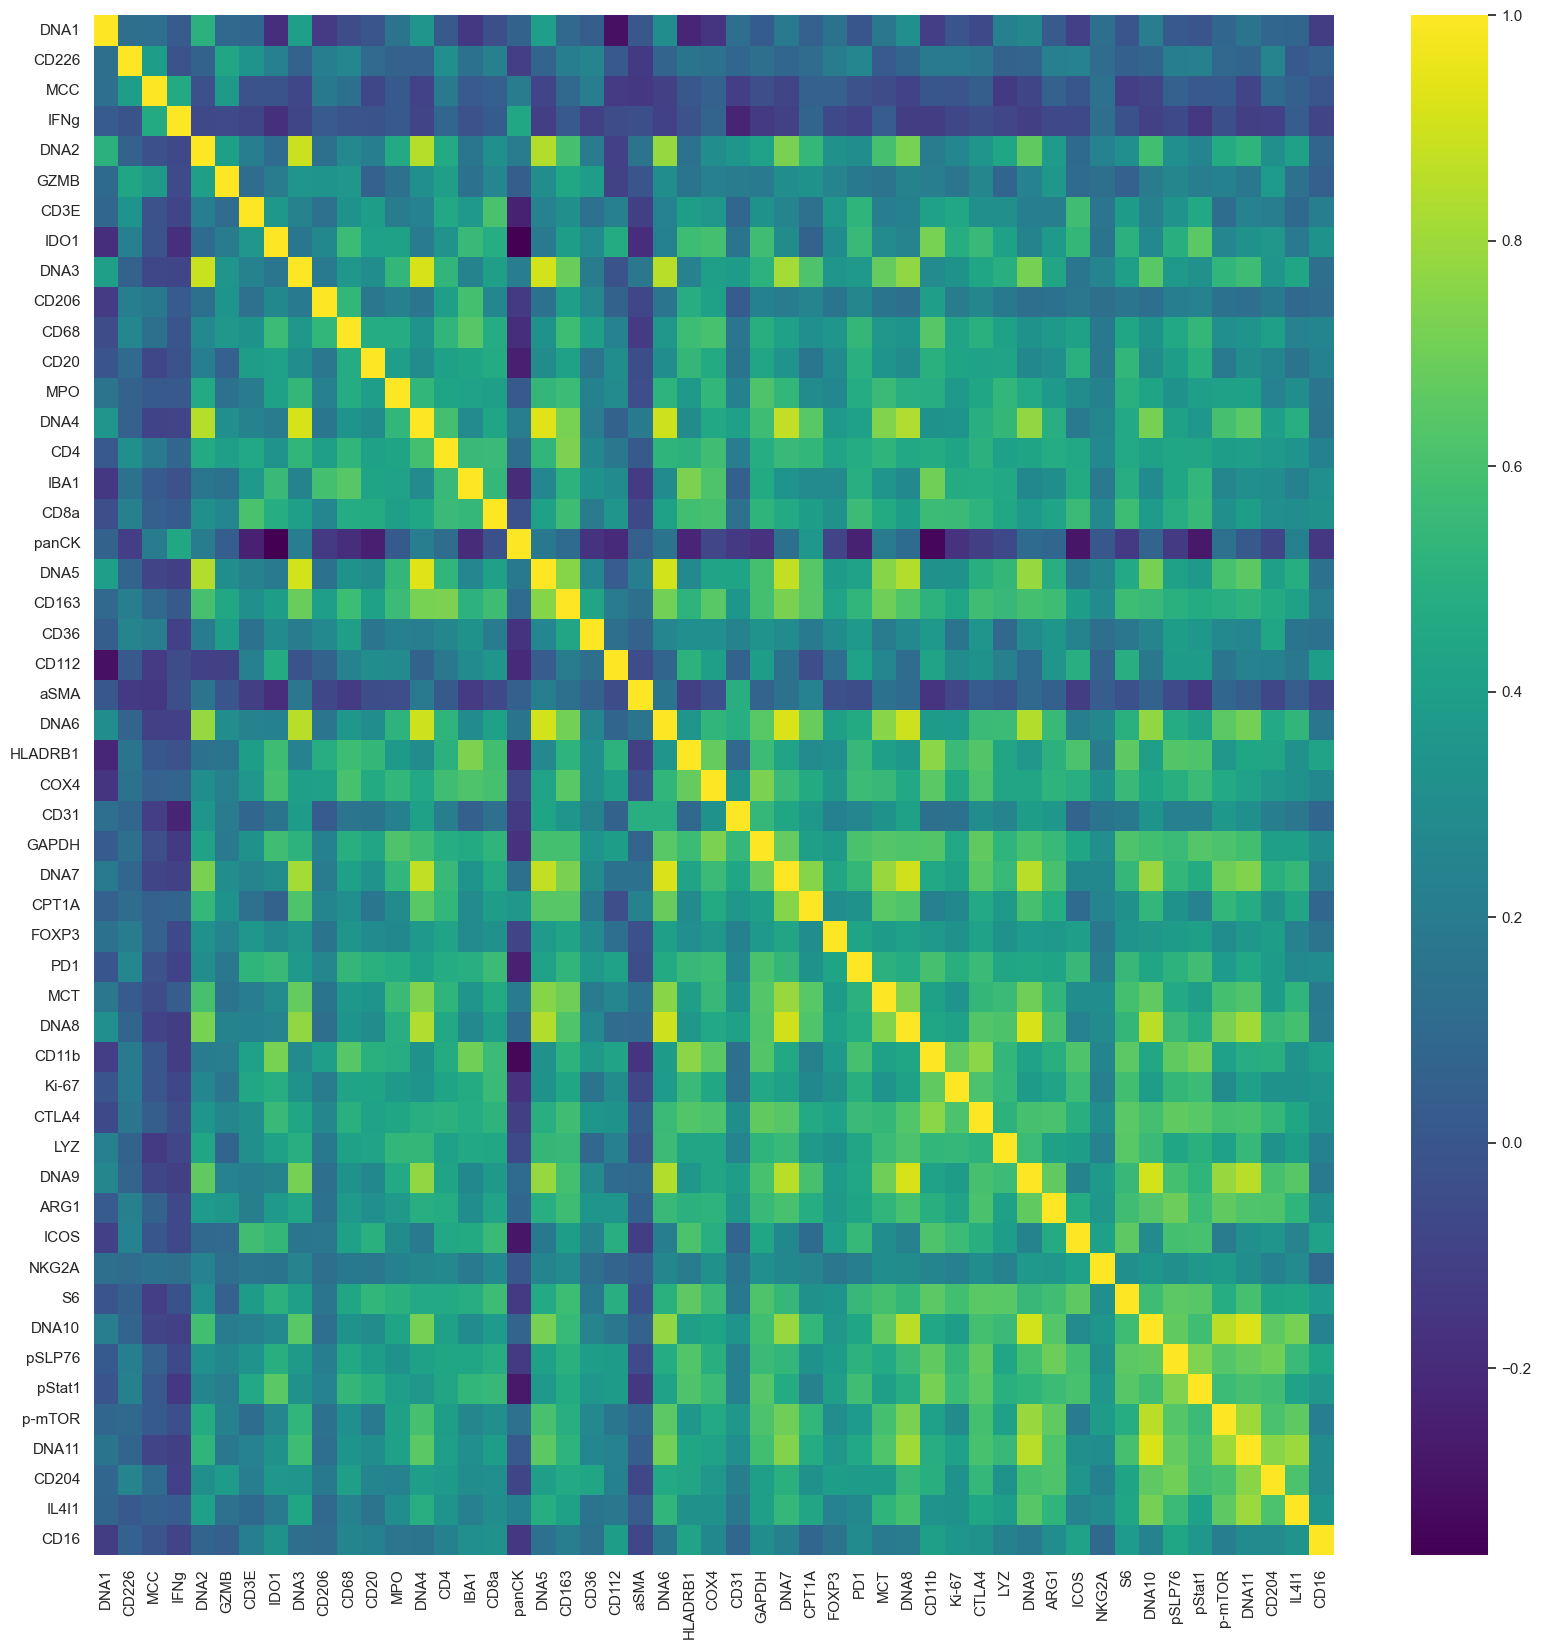

In [23]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr_df.corr(), cmap= 'viridis', annot=False)

<Axes: >

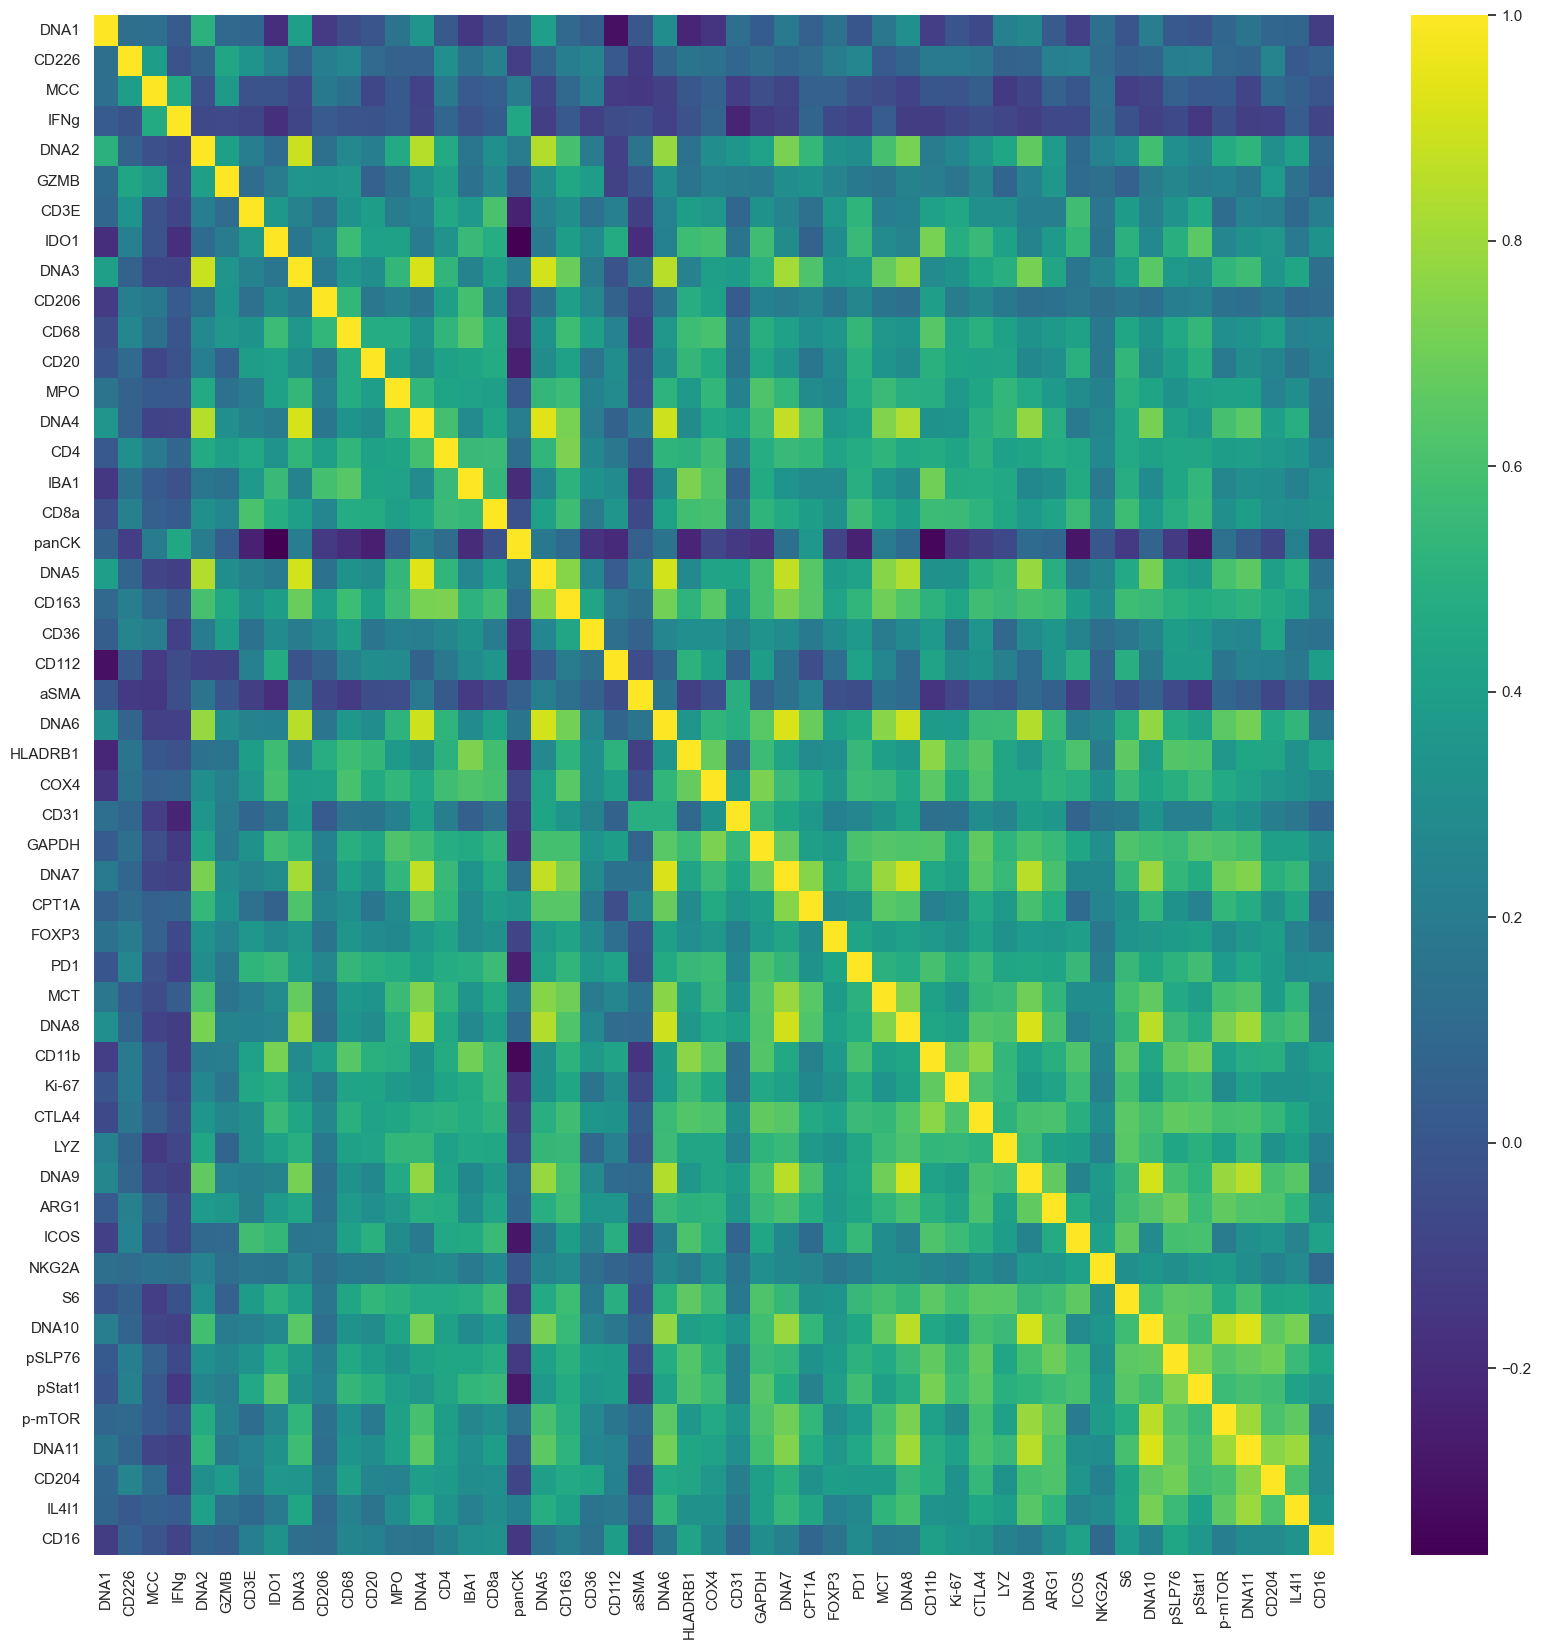

In [24]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr_df.corr(), cmap= 'viridis', annot=False)

In [25]:
corr_df = pd.DataFrame(adata.X, columns=adata.var_names, index=adata.obs.index)

<Axes: >

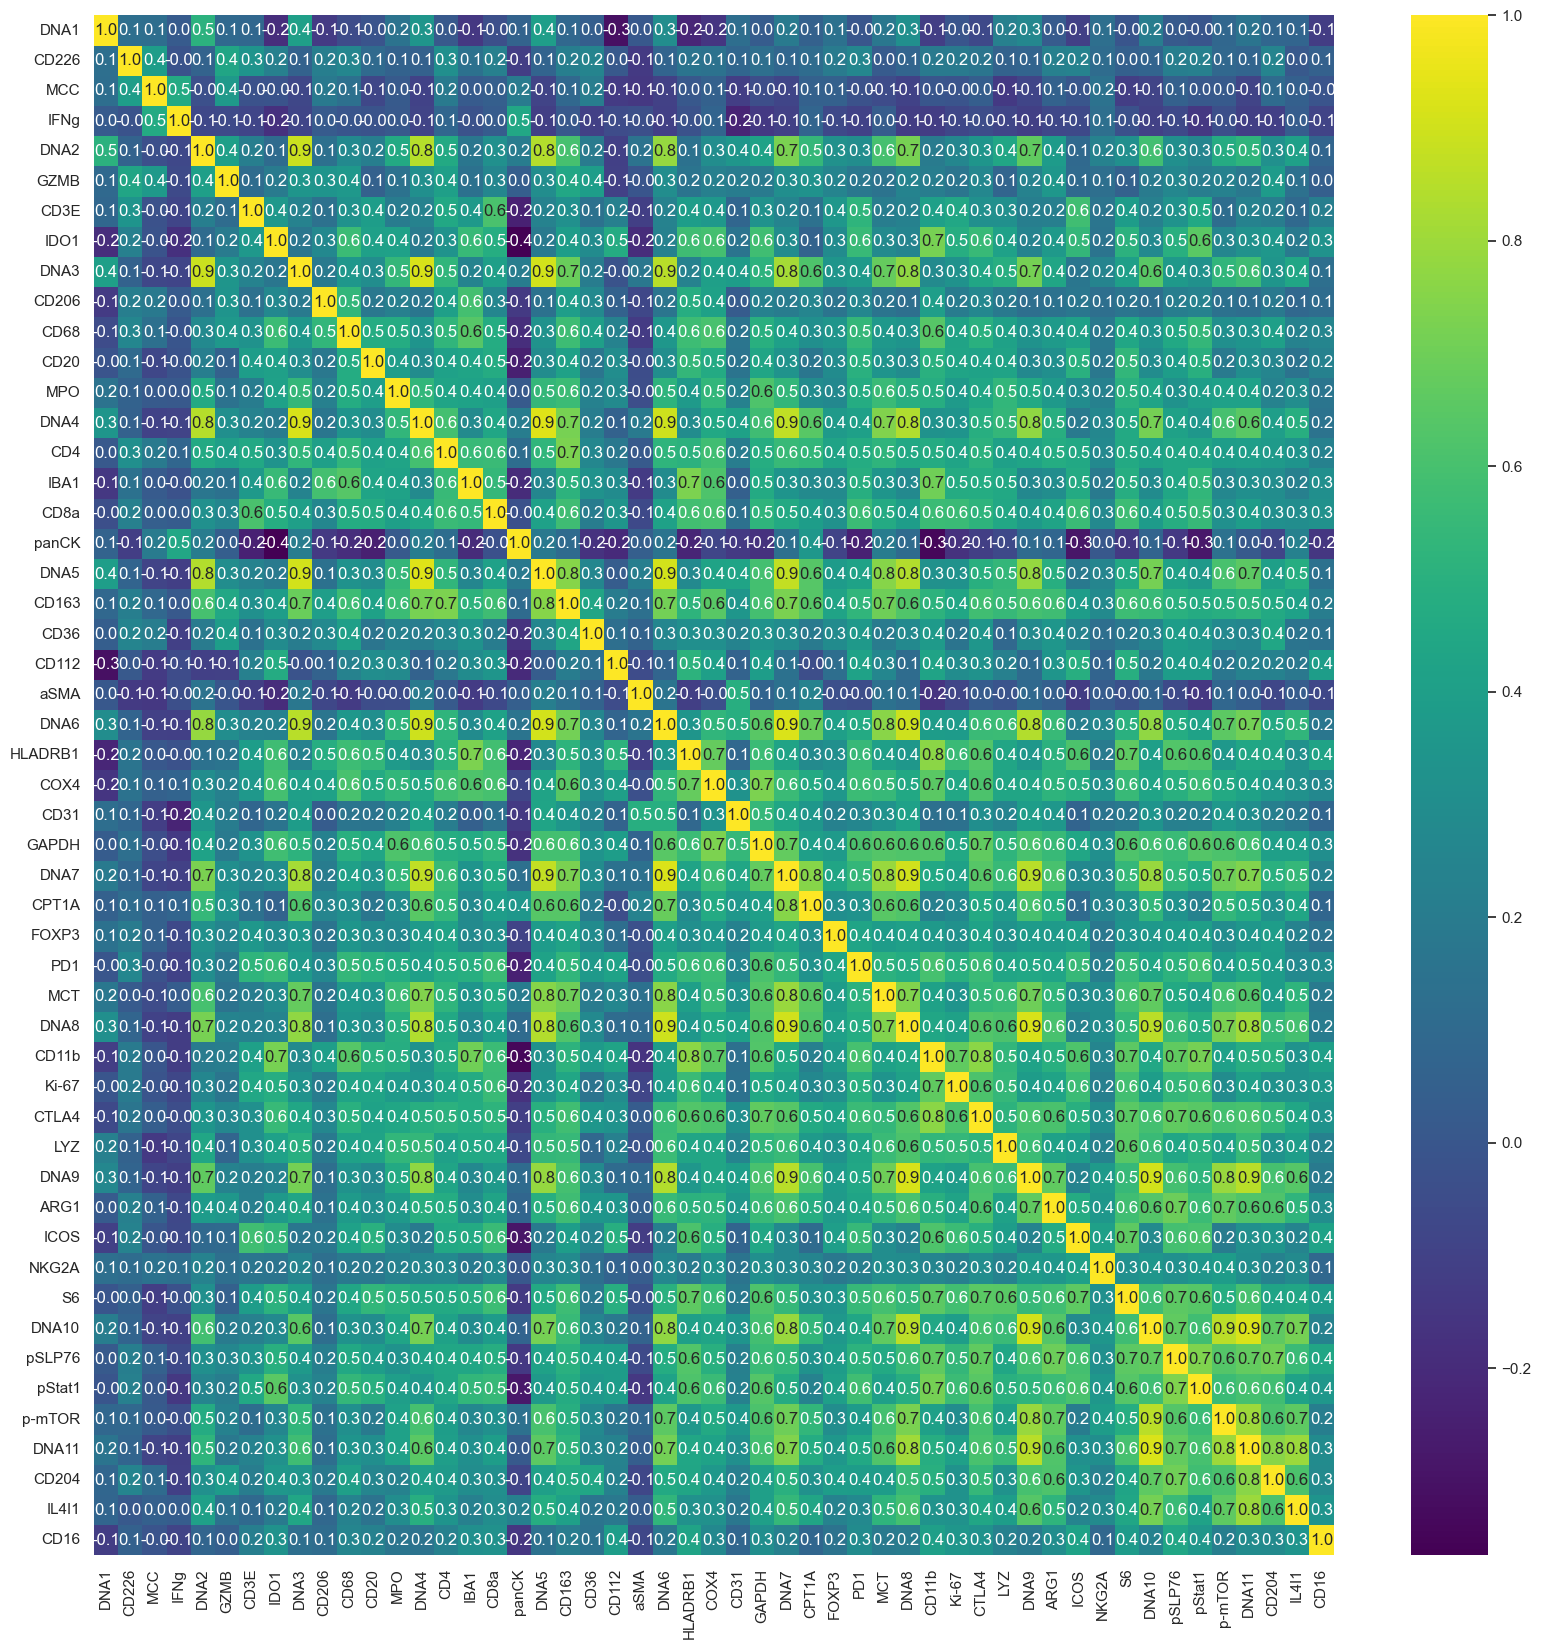

In [26]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr_df.corr(), cmap= 'viridis', annot=True, fmt=".1f")

In [27]:
ordered_genes = ['CD20', 'CD3E', 'CD4', 'CD8a', 'FOXP3', 'GZMB',  'Ki-67', 'CTLA4', 'ICOS',  'PD1', 'NKG2A', 'CD226', 'IFNg', 'CD11b', 'IBA1', 'CD68', 'CD163', 'CD206', 'IDO1',
                 'MCC', 'MCT',  'MPO', 'LYZ', 'GAPDH', 'HLADRB1', 'COX4', 'CPT1A', 'CD112', 'S6', 'pStat1',  'p-mTOR', 'CD204', 'IL4I1', 'aSMA',  'panCK', 'CD31', 'CD36']

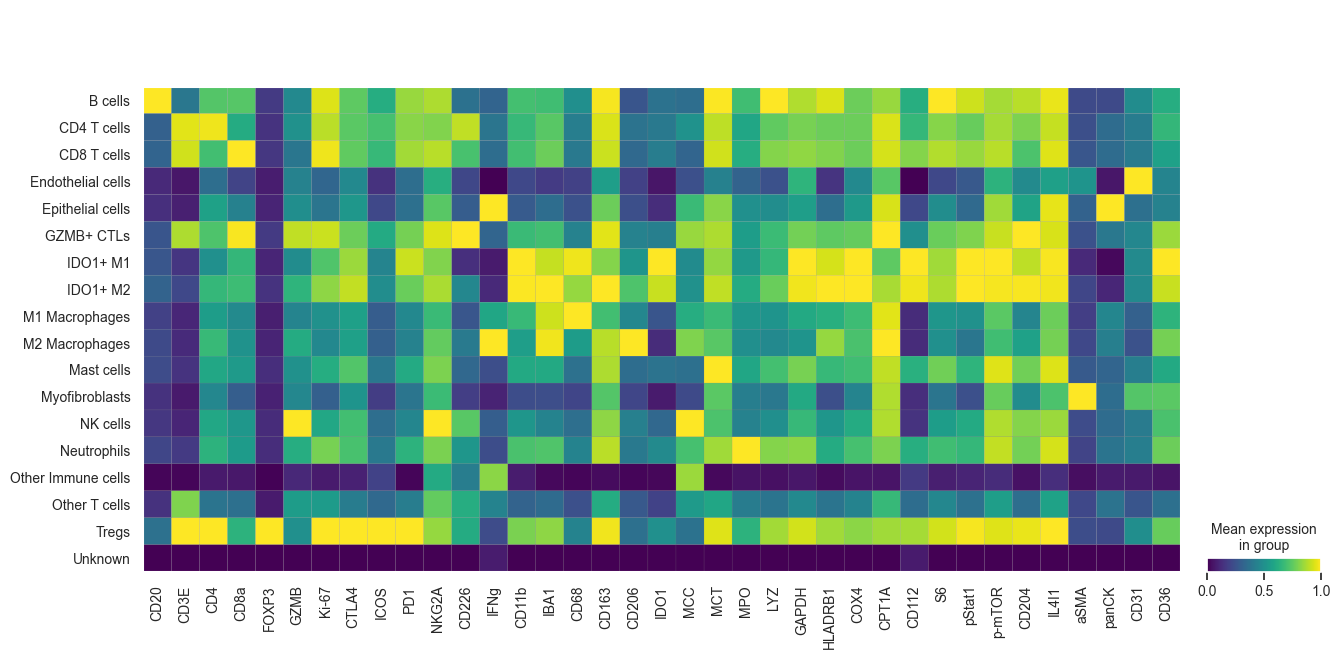

In [28]:
#sc.pl.matrixplot(adata, var_names= adata.var_names, groupby='phenotype_main', categories_order= categories_order1, dendrogram= False, use_raw=False, cmap="viridis", standard_scale='var')
sc.pl.matrixplot(adata, var_names= ordered_genes, groupby='phenotype_main', dendrogram= False, use_raw=False, cmap="viridis", standard_scale='var')

In [20]:
image_path = "/Volumes/HiTS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/LSP21926/registration/LSP21926.ome.tif"

In [32]:
sm.pl.image_viewer (image_path, adata, overlay='phenotype_main',  
                    channel_names=["DNA1", "CD226", "MCC", "IFNg", "DNA2", "GZMB", "CD3E", "IDO1", "DNA3", "CD206", "CD68", "CD20", "MPO", "DNA4", "CD4", 
                                   "IBA1", "CD8a", "panCK", "DNA5", "CD163", "CD36", "CD112", "aSMA", "DNA6", "HLADRB1", "COX4", "CD31", "GAPDH", "DNA7", 
                                   "CPT1A", "FOXP3", "PD1", "MCT", "DNA8", "CD11b", "Ki-67", "CTLA4", "LYZ", "DNA9", "ARG1", "ICOS", "NKG2A", "S6", "DNA10",
                                   "pSLP76", "pStat1", "p-mTOR", "DNA11", "CD204", "IL4I1", "CD16"], point_size=12, overlay_category=None, 
                    subset='LSP21926--unmicst_cellRing', imageid='imageid', point_color=colors)

In [22]:
granROI_LSP21926 = pd.read_csv("/Users/hitslsp/Downloads/LSP21926.ome.tif-11622-rois.csv")

In [23]:
sm.hl.addROI_omero(adata, granROI_LSP21926, label='granROI', imageid='imageid', subset = "LSP21926--unmicst_cellRing", overwrite= False)
print ('LSP21926--unmicst_cellRing_done')

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/helpers/addROI_omero.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inside['ROI_internal'] = roi_subset['Name']
/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/helpers/addROI_omero.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inside['ROI_internal'] = roi_subset['Name']


LSP21926--unmicst_cellRing_done


In [5]:
savedir = '/Users/hitslsp/Desktop/NHP_Density_Plots'
#for each image, create a density plot. Marker A (SOX10) is reference marker. 
for f in quant_files:
    print(f'Loading and processing {f}')
    adata = sm.pp.mcmicro_to_scimap([f], remove_dna=False, log = True) 
    imageid = adata.obs['imageid'][0]
    sm.pl.densityPlot2D(adata, 'panCK', markerB=None, layer=None, ncols=None, cmap='jet', figsize=(3, 3), 
                    hline='auto', vline='auto', fontsize=None, dpi=100, xticks=None, yticks=None, saveDir=savedir, 
                    fileName='{}densityPlot2D.pdf'.format(imageid)) 

Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23692--unmicst_cellRing.csv
Loading LSP23692--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23692--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23792--unmicst_cellRing.csv
Loading LSP23792--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23792--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23832--unmicst_cellRing.csv
Loading LSP23832--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23832--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP21946--unmicst_cellRing.csv
Loading LSP21946--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP21946--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23677--unmicst_cellRing.csv
Loading LSP23677--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23677--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23652--unmicst_cellRing.csv
Loading LSP23652--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23652--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23712--unmicst_cellRing.csv
Loading LSP23712--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23712--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP21981--unmicst_cellRing.csv
Loading LSP21981--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP21981--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23757--unmicst_cellRing.csv
Loading LSP23757--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23757--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23742--unmicst_cellRing.csv
Loading LSP23742--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23742--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23637--unmicst_cellRing.csv
Loading LSP23637--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23637--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23657--unmicst_cellRing.csv
Loading LSP23657--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23657--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23777--unmicst_cellRing.csv
Loading LSP23777--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23777--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP21926--unmicst_cellRing.csv
Loading LSP21926--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP21926--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP21961--unmicst_cellRing.csv
Loading LSP21961--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP21961--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23817--unmicst_cellRing.csv
Loading LSP23817--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23817--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23772--unmicst_cellRing.csv
Loading LSP23772--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23772--unmicst_cellRingdensityPlot2D.pdf
Loading and processing /Volumes/HITS/lsp-analysis/cycif-production/17-tuberculosis-aldridge/p17e20_NHPTB_IDOi_main/quantification/LSP23717--unmicst_cellRing.csv
Loading LSP23717--unmicst_cellRing.csv


/var/folders/c1/hrvpnjdx3hq53yv639g1ylrw0000gq/T/ipykernel_97629/1474941236.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



Saved heatmap to /Users/hitslsp/Desktop/NHP_Density_Plots/LSP23717--unmicst_cellRingdensityPlot2D.pdf
